# ToDo

1-hyperparameter tuninning for each model to adjust f1-score for low class

2-search for better balancing way to balance data

3-try to make feature engineering to build new relevant features(unsuppervised like clustering)

4-try to handle outliers(logtransfom,powertransform,clipping outliers at IQR or robust scaling)

5-search for more effective feature

6-is there more better way than PCA? [take most important features and drop the rest]

7-try lightboost and softVoting between best models used

# make imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [68]:
data=pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
data.head()

ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   0  58238    971.303       397.202654       186.945510      2.124697   
1   1  44515    757.601       265.590470       213.967453      1.241266   
2   2  31662    653.783       239.902428       168.421505      1.424417   
3   3  38778    734.020       268.446281       184.061923      1.458456   
4   4  42530    775.403       281.212824       193.236878      1.455275   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1      0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2      0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3      0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4      0.726511       43028     232.703412  0.729816  0.988426   0.888895   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.685561      0.006820      0.000929      0.469994      0.998595   
1     0.896387      0.005966      0.002376      0.803510      0.997370   
2     0.836931      0.007577      0.002293      0.700453      0.997737   
3     0.827733      0.006923      0.002005      0.685142      0.999250   
4     0.827499      0.006612      0.001912      0.684755      0.996507   

          y  
0     HOROZ  
1     SEKER  
2  DERMASON  
3  DERMASON  
4      SIRA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

# Check for missing values

In [5]:
data.isna().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [6]:
data.describe().T

count          mean           std           min  \
ID               10834.0   5416.500000   3127.650742      0.000000   
Area             10834.0  53095.675189  29542.542580  20420.000000   
Perimeter        10834.0    855.274892    214.991122    524.932000   
MajorAxisLength  10834.0    320.036169     85.961630    183.601165   
MinorAxisLength  10834.0    202.410342     45.113965    129.576207   
AspectRation     10834.0      1.581294      0.244314      1.024868   
Eccentricity     10834.0      0.750588      0.091481      0.218951   
ConvexArea       10834.0  53816.205926  29999.710739  20684.000000   
EquivDiameter    10834.0    253.123583     59.433080    161.243764   
Extent           10834.0      0.749937      0.048949      0.555315   
Solidity         10834.0      0.987152      0.004626      0.919246   
roundness        10834.0      0.873647      0.059344      0.489618   
Compactness      10834.0      0.800244      0.061228      0.645368   
ShapeFactor1     10834.0      0.006559      0.001127      0.002856   
ShapeFactor2     10834.0      0.001718      0.000593      0.000564   
ShapeFactor3     10834.0      0.644139      0.098268      0.416499   
ShapeFactor4     10834.0      0.995083      0.004306      0.947687   

                          25%           50%           75%            max  
ID                2708.250000   5416.500000   8124.750000   10833.000000  
Area             36343.500000  44645.000000  61295.000000  254616.000000  
Perimeter          703.601250    793.739500    975.517500    1985.370000  
MajorAxisLength    253.501071    296.377365    376.068399     738.860153  
MinorAxisLength    175.927024    192.525040    217.315195     450.926187  
AspectRation         1.432985      1.550761      1.703029       2.388873  
Eccentricity         0.716250      0.764314      0.809450       0.908167  
ConvexArea       36731.250000  45148.000000  62251.500000  263261.000000  
EquivDiameter      215.113880    238.419335    279.362162     569.374358  
Extent               0.718778      0.760141      0.786871       0.866195  
Solidity             0.985627      0.988290      0.990014       0.994677  
roundness            0.833479      0.883472      0.916883       0.990685  
Compactness          0.763378      0.801428      0.834068       0.987303  
ShapeFactor1         0.005888      0.006643      0.007268       0.009897  
ShapeFactor2         0.001161      0.001700      0.002169       0.003665  
ShapeFactor3         0.582747      0.642287      0.695670       0.974767  
ShapeFactor4         0.993690      0.996397      0.997895       0.999733

In [7]:
data.rename(columns = {'y':'Class'}, inplace = True)

In [8]:
data['Class'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: Class, dtype: int64

In [9]:
data['Class'].replace({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6},inplace=True)

In [10]:
data.sample(1)

ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
3617  3617  35251    697.445       257.804874       174.346008      1.478697   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
3617      0.736653       35645     211.856006  0.718763  0.988947   0.910671   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
3617     0.821769      0.007313      0.002057      0.675304       0.99857   

      Class  
3617      0

# Explore classes imbalance

<AxesSubplot:>

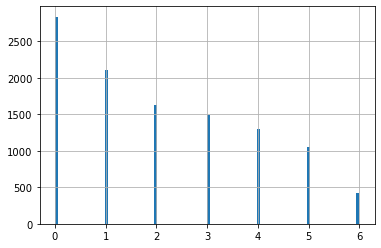

In [11]:
data['Class'].hist(bins=int(np.sqrt(data['Class'].shape[0])))

In [12]:
y=data['Class']
X=data.drop(columns='Class')

# split data with ratio between classes is fixed in train/test/div sets

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=data['Class'])

In [14]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42,stratify=y_train)

In [15]:
y_train.value_counts()/len(y_train)

0    0.261936
1    0.194577
2    0.149719
3    0.137314
4    0.120294
5    0.097649
6    0.038511
Name: Class, dtype: float64

In [16]:
y_val.value_counts()/len(y_val)

0    0.261822
1    0.194925
2    0.149366
3    0.137255
4    0.120531
5    0.097463
6    0.038639
Name: Class, dtype: float64

# Fit base model to see the effect of imbalance on classifier performance

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

# Important features to consider

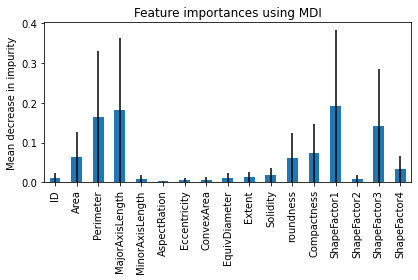

In [18]:
importances=clf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=forest_importances, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [19]:
y_pred=clf.predict(X_val)
y_pred_prob=clf.predict_proba(X_val)

In [20]:
# pip install scikit-plot
# !pip install -U imbalanced-learn
# !pip install imblearn

In [21]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

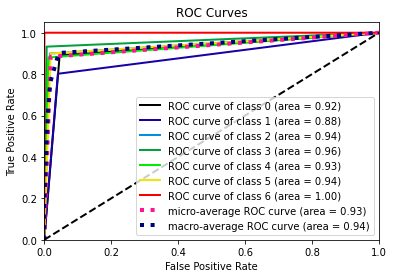

In [22]:
plot_roc(y_val, y_pred_prob)

model can differenatiate between different classes well so untill now we don't need to make down or oversampling or handeling

imbalance yet

# Preprocessing on train data

In [23]:
X_train_copy=X_train.copy()
y_train_copy=y_train.copy()
data_copy=pd.concat([X_train,y_train],axis=1)

# Give trial to oversampling low class

In [24]:
data_copy.head()

ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2418  2418  48831    871.270       318.951429       195.579961      1.630798   
3196  3196  30994    650.335       238.284268       165.932173      1.436034   
4471  4471  37138    707.772       252.256064       187.593961      1.344692   
1492  1492  42269    776.825       283.921217       189.835574      1.495617   
5354  5354  46436    824.571       316.125908       187.993569      1.681578   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
2418      0.789930       49662     249.346266  0.789009  0.983267   0.808351   
3196      0.717690       31344     198.652426  0.755804  0.988834   0.920902   
4471      0.668553       37506     217.452455  0.750354  0.990188   0.931626   
1492      0.743604       42786     231.988281  0.742656  0.987917   0.880208   
5354      0.803963       47202     243.154584  0.681920  0.983772   0.858240   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
2418     0.781769      0.006532      0.001505      0.611162      0.996682   
3196     0.833678      0.007688      0.002291      0.695020      0.998072   
4471     0.862031      0.006792      0.002314      0.743097      0.999236   
1492     0.817087      0.006717      0.001847      0.667631      0.998520   
5354     0.769170      0.006808      0.001470      0.591623      0.994860   

      Class  
2418      5  
3196      0  
4471      2  
1492      1  
5354      1

In [27]:
# pip install -U imbalanced-learn

In [28]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='all')
X_train_copy,y_train_copy = oversample.fit_resample(X_train_copy,y_train_copy)

<AxesSubplot:>

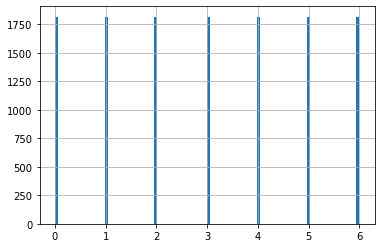

In [29]:
y_train_copy.hist(bins=int(np.sqrt(data['Class'].shape[0])))

In [30]:
data_copy=pd.concat([X_train_copy,y_train_copy],axis=1)

# Overview on data distribution

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>],
       [<AxesSubplot:title={'center':'MinorAxisLength'}>,
        <AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>],
       [<AxesSubplot:title={'center':'EquivDiameter'}>,
        <AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>],
       [<AxesSubplot:title={'center':'Compactness'}>,
        <AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>],
       [<AxesSubplot:title={'center':'ShapeFactor4'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], d

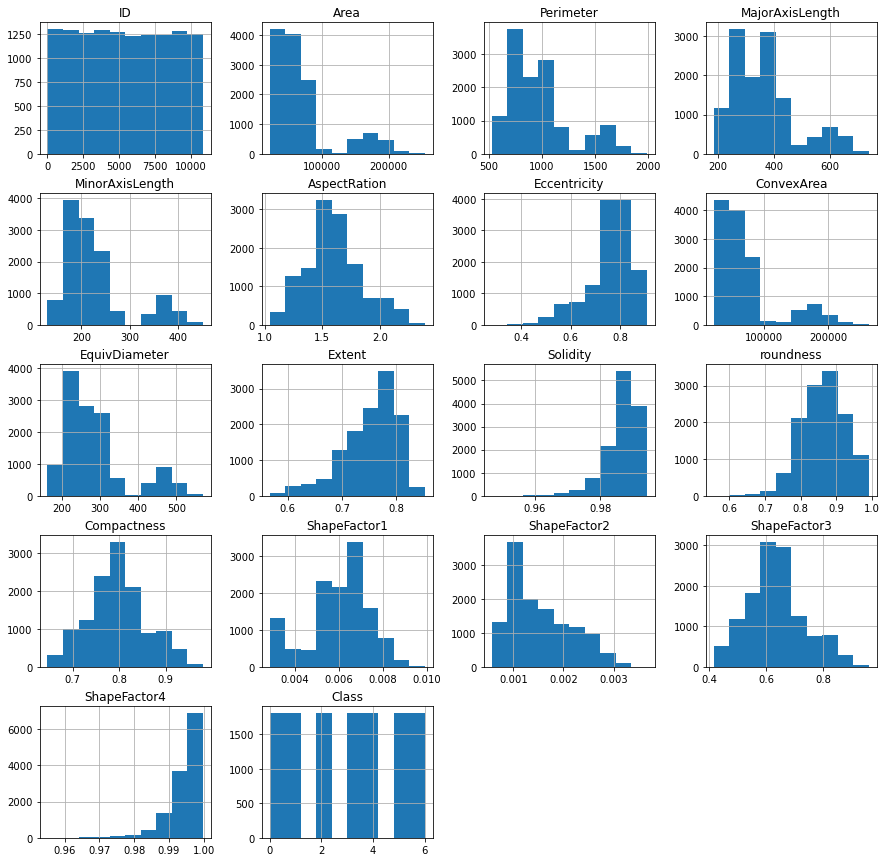

In [31]:
data_copy.hist(figsize=(15,15))

# Handeling skewness and outliers

# Explore correlation(linear relation) between data

In [32]:
data_copy.corr()['Class'].sort_values(ascending=False)

Class              1.000000
Perimeter          0.862969
EquivDiameter      0.841418
MajorAxisLength    0.830879
MinorAxisLength    0.809926
ConvexArea         0.789590
Area               0.788709
Eccentricity       0.234879
AspectRation       0.207717
Extent             0.088863
ID                 0.000285
Compactness       -0.234605
ShapeFactor3      -0.238776
Solidity          -0.294203
ShapeFactor4      -0.349779
roundness         -0.468230
ShapeFactor2      -0.686288
ShapeFactor1      -0.859902
Name: Class, dtype: float64

In [33]:
data_copy.corr().style.background_gradient(cmap='coolwarm')

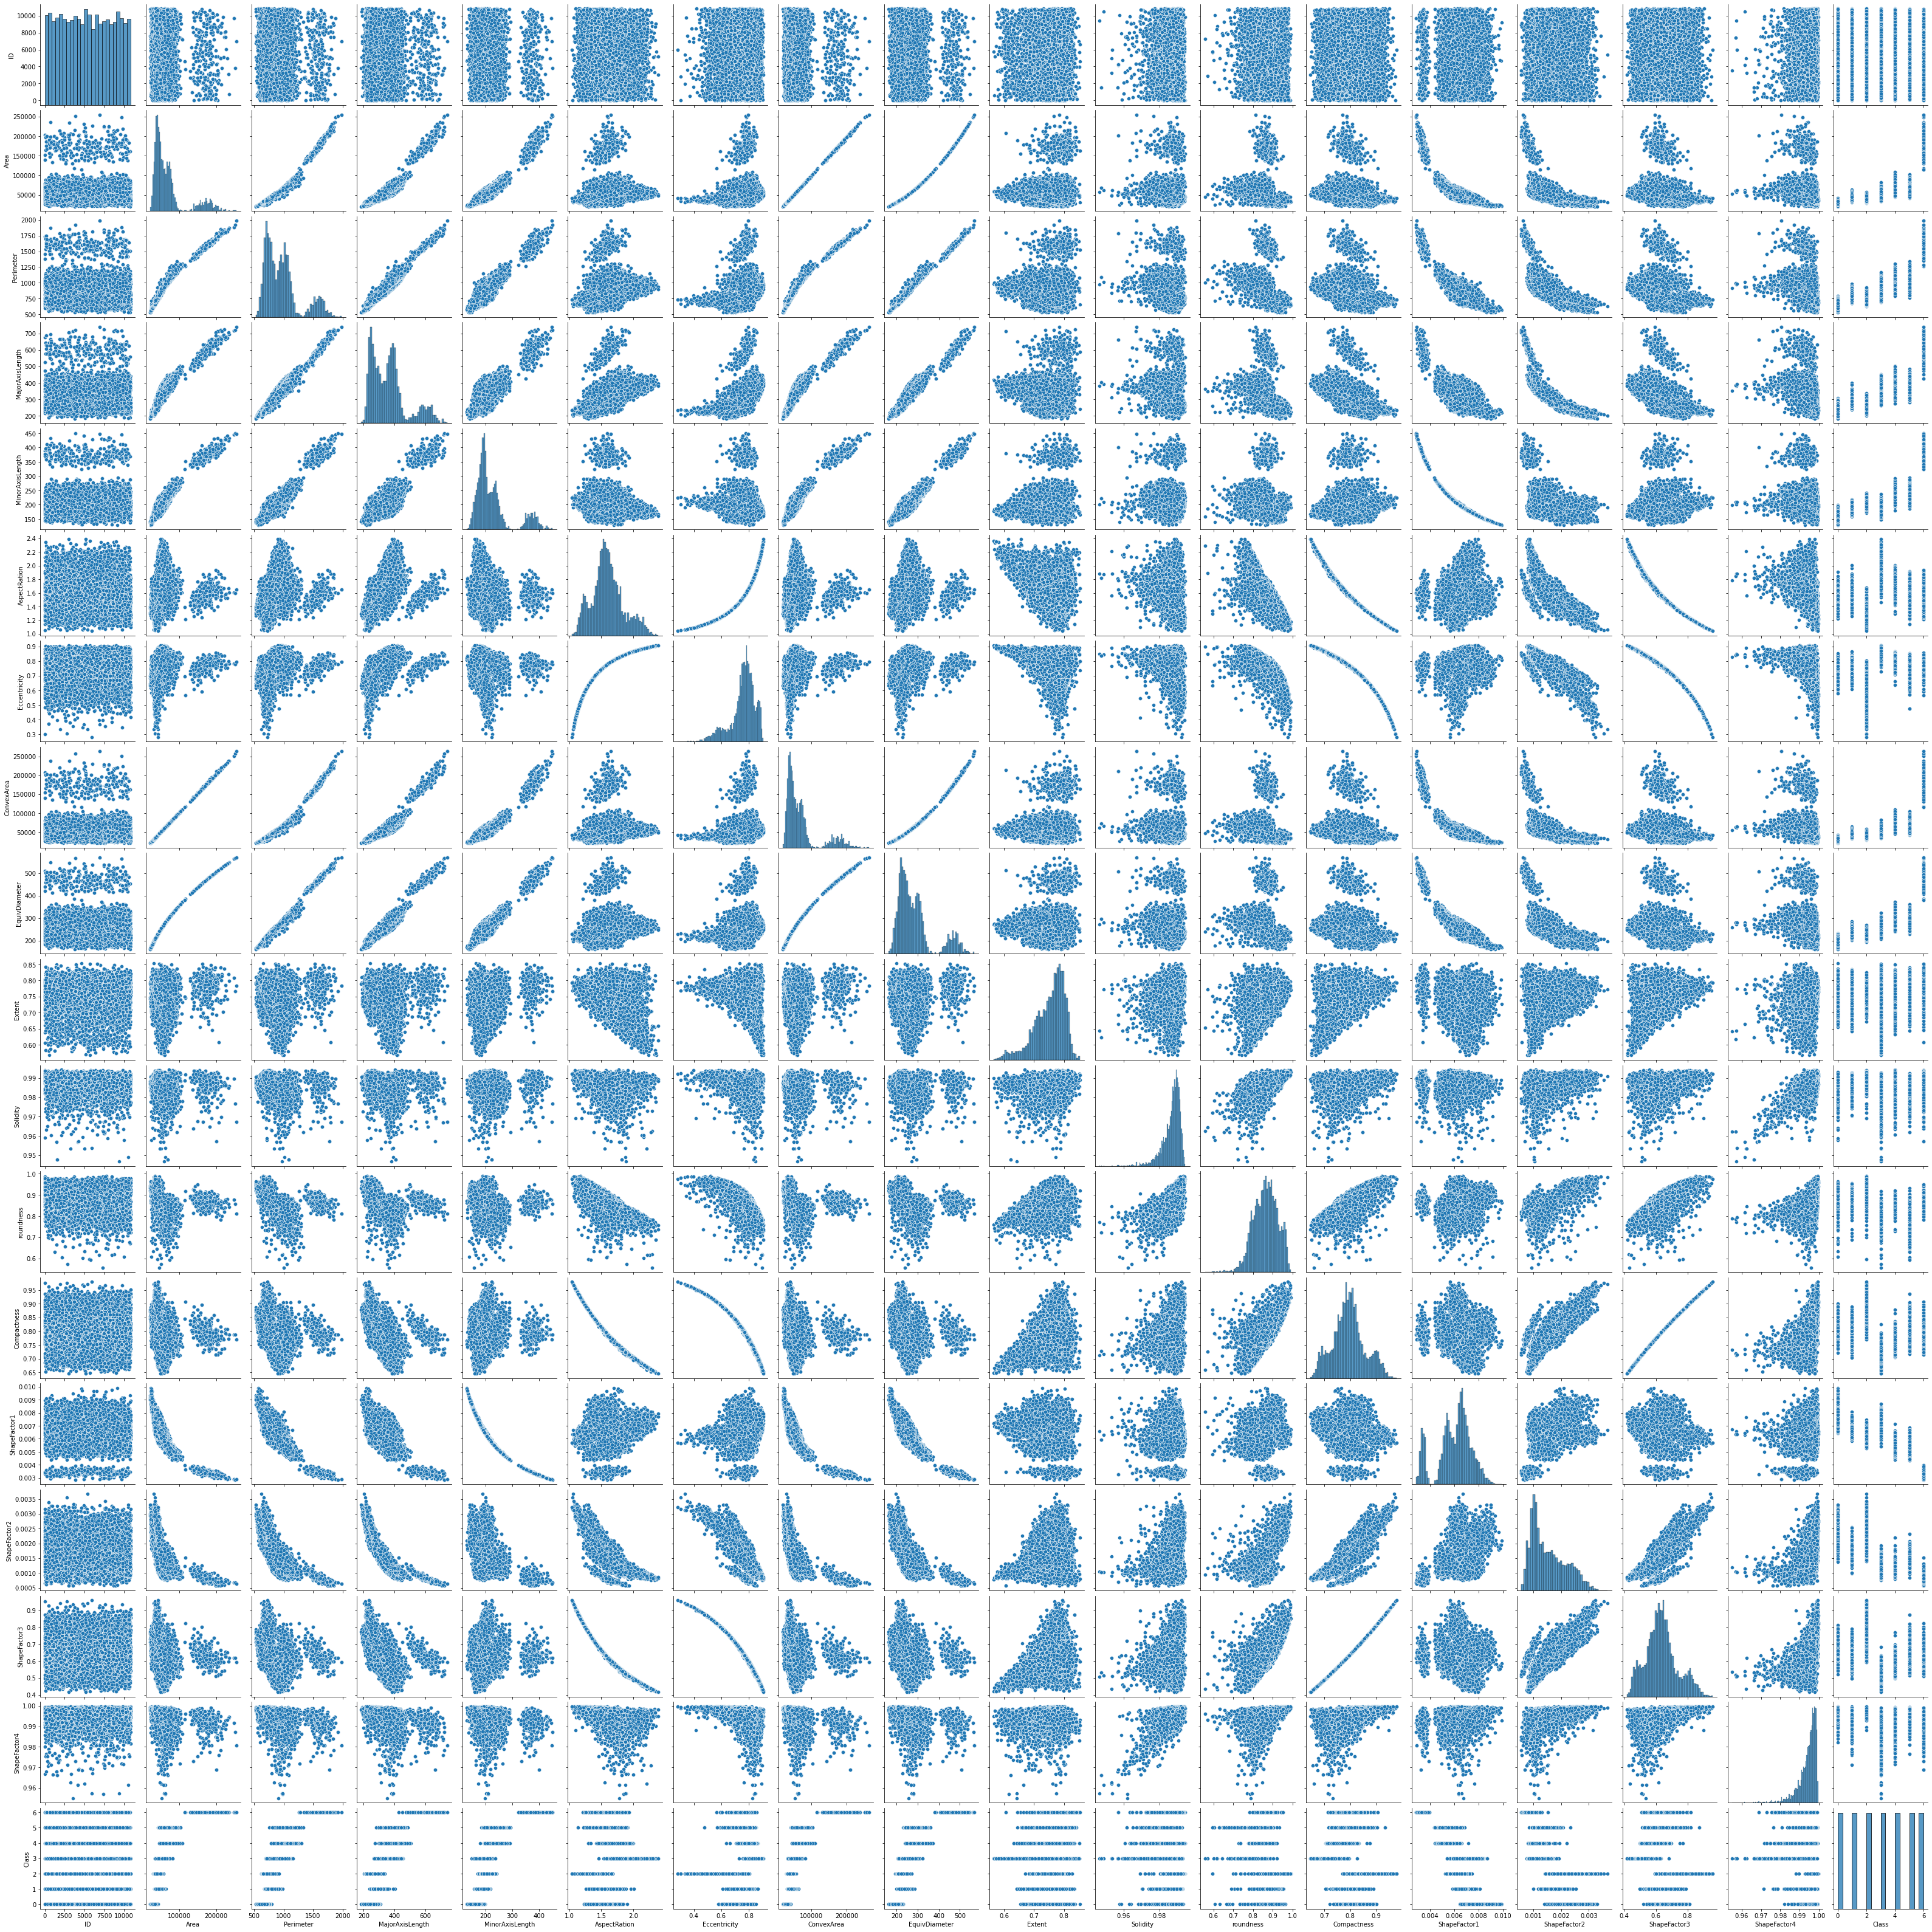

In [34]:
# sns.pairplot(data_copy)

In [42]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data_copy_features=data_copy.drop(columns='Class')
data_copy_label=data_copy['Class']

In [43]:
data_copy_features_scaled=scale.fit_transform(data_copy_features)

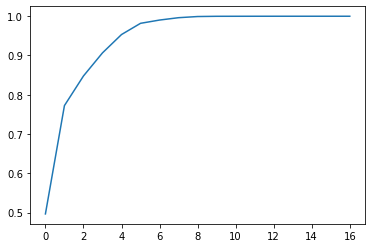

In [44]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data_copy_features_scaled)
exp_var=pca.explained_variance_ratio_
exp_cumsum=np.cumsum(exp_var)
plt.plot(exp_cumsum)

I think 4 components will achieve about 97% preserving the data so it's fine

In [45]:
pca=PCA(n_components=6)
X=pca.fit_transform(data_copy_features_scaled)
data_copy_pca=pd.DataFrame(X)
data_copy_pca.head()

0         1         2         3         4         5
0 -0.496024  1.056339  0.233976  0.994480  0.702610  1.201967
1 -3.372991  0.063700 -0.203680  0.694425  0.043257 -0.219145
2 -3.380768 -1.085994 -0.240075  0.249935 -0.363330 -0.090227
3 -1.965131  0.193351 -0.292196  1.212078 -0.348002  0.317713
4 -0.598648  1.797401  0.267991 -0.046266 -0.948971 -0.191227

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>]], dtype=object)

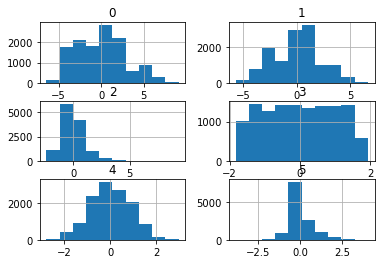

In [46]:
data_copy_pca.hist()

# Val data pipeline

In [47]:
X_val_scaled=scale.transform(X_val)
X=pca.transform(X_val_scaled)
val_data_copy_pca=pd.DataFrame(X)
val_data_copy_pca.head()

0         1         2         3         4         5
0 -2.736278  0.330227 -0.357054  1.623186 -0.466849 -0.275933
1  0.346788  3.250828 -0.986220  1.057785  2.021345  0.425529
2 -2.463872  2.577452  0.619286 -0.330441 -0.176895 -0.031503
3  1.645238  3.981708  2.319006 -1.672843 -0.663929 -1.931005
4 -4.156077 -2.990811  0.734315  0.161024 -0.386626  0.149621

# Test base classifiers

In [48]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix

# Simple_SVM

In [49]:
clf_svm=SVC()
clf_svm.fit(data_copy_pca,data_copy_label)

SVC()

In [50]:
y_pred=clf_svm.predict(val_data_copy_pca)

In [51]:
accuracy_score(y_val,y_pred)

0.9256055363321799

In [52]:
f1_score(y_val,y_pred,average='micro')

0.9256055363321799

In [53]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       454
           1       0.87      0.90      0.89       338
           2       0.95      0.94      0.94       259
           3       0.97      0.96      0.97       238
           4       0.93      0.92      0.93       209
           5       0.90      0.93      0.91       169
           6       1.00      1.00      1.00        67

    accuracy                           0.93      1734
   macro avg       0.94      0.94      0.94      1734
weighted avg       0.93      0.93      0.93      1734



C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


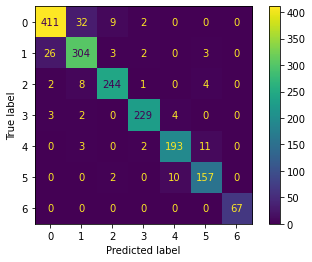

In [54]:
 plot_confusion_matrix(clf_svm,val_data_copy_pca,y_val)

# Random_search

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import cross_val_score

In [ ]:
# distributions = dict(C=np.arange(0.01,5,0.1),kernel=['linear','rbf'])
# clf = RandomizedSearchCV(clf_svm, distributions, random_state=0)
# search = clf.fit(data_copy_pca,data_copy_label)


In [ ]:
# search.best_params_

In [ ]:
# search.best_score_

In [ ]:
# best_svm_so_far=SVC(kernel= 'rbf', C= 4.71)
# best_svm_so_far.fit(data_copy_pca,data_copy_label)

In [ ]:
# score_cross_val=cross_val_score(best_svm_so_far,X_val_scaled,y_val,cv=3)

In [ ]:
# np.mean(score_cross_val)

# Random_forrest

In [59]:
# clf_rf = RandomForestClassifier(max_depth=6, random_state=0)
# clf_rf.fit(data_copy_pca,data_copy_label)

In [60]:
# y_pred=clf_rf.predict(val_data_copy_pca)

In [61]:
# print(classification_report(
#     y_val,
#     y_pred,
#     output_dict=False
# ))

In [62]:
# distributions = dict(n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],max_depth=np.arange(8,100), min_samples_split=[2,5,10],bootstrap=[True,False])
# clf = RandomizedSearchCV(clf_rf, distributions, random_state=0)
# search = clf.fit(data_copy_pca,data_copy_label)

In [ ]:
# search.best_estimator_

In [ ]:
# search.best_score_

In [ ]:
# clf_rf2=RandomForestClassifier(bootstrap=False, max_depth=31, min_samples_split=5,
#                        n_estimators=1800, random_state=0)

In [ ]:
# clf_rf2.fit(data_copy_pca,data_copy_label)

In [ ]:
# y_pred=clf_rf2.predict(val_data_copy_pca)

In [ ]:
# print(classification_report(
#     y_val,
#     y_pred,
#     output_dict=False
# ))

# GradientBoost

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=800,min_samples_split=5,max_depth=10)

In [64]:
clf_gb.fit(data_copy_pca,data_copy_label)

GradientBoostingClassifier(max_depth=10, min_samples_split=5, n_estimators=800)

In [65]:
y_pred=clf_gb.predict(val_data_copy_pca)

In [66]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       454
           1       0.87      0.85      0.86       338
           2       0.95      0.93      0.94       259
           3       0.97      0.95      0.96       238
           4       0.91      0.95      0.93       209
           5       0.92      0.89      0.91       169
           6       1.00      1.00      1.00        67

    accuracy                           0.92      1734
   macro avg       0.93      0.93      0.93      1734
weighted avg       0.92      0.92      0.92      1734



In [67]:
Beans_predictions = clf_gb.predict(test_data)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 17 features, but GradientBoostingClassifier is expecting 6 features as input.

# XGboost

In [ ]:
import xgboost as xgb

In [ ]:
clf_xg=xgb.XGBClassifier()
clf_xg.fit(data_copy_pca,data_copy_label)

In [ ]:
y_pred=clf_xg.predict(val_data_copy_pca)

In [ ]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))